In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
from thermal_lib import *

%matplotlib notebook

In [2]:

pth = r'D:\thermography\cdkl5_thermal_behaviour_group1\unico'
sub = Subjects(pth)
print(sub)

Number of Subjects: 8

0 -> ID: KO_69 RECs: 3
1 -> ID: WT_71 RECs: 3
2 -> ID: KO_70 RECs: 3
3 -> ID: WT_74 RECs: 3
4 -> ID: WT_79 RECs: 3
5 -> ID: KO_72 RECs: 3
6 -> ID: WT_81 RECs: 3
7 -> ID: KO_75 RECs: 3



In [3]:



def plot_avg(var, isDay, draw_sub=True, draw_sem = True, draw_zero = False, ax=None, color='b'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    if draw_zero:
        ax.axhline(0,color='k',linestyle='--')

    if draw_sub:
        for c in var.columns:
            ax.plot(var.index, var[c],color,alpha=.1)

    avg = var.mean(axis=1) 

    if draw_sem:
        sem = var.sem(axis=1) 
        ax.fill_between(var.index, avg+sem, avg-sem, alpha=.3, color=color,edgecolor='none')

    ax.plot(var.index, avg,color,alpha=1)
    xlims = [var.index[0], var.index[-1]]
    ax.set_xlim(xlims)
    ylims = ax.get_ylim()
    ax.fill_between(var.index, y1=ylims[0], y2=ylims[1], where=isDay<1,alpha=.2, color='gray',edgecolor='none')
    ax.set_ylim(ylims)
    #ax.set_xlabel('Time [Hours]')




## 24 Hours average

In [1]:


# motion 
motion = dict()
isDay = list()
for info,rec in sub.iter_data_day():
    motion[(info['geno'], info['id'])] = rec['distance']
isDay = rec.isDay
motion = pd.DataFrame.from_dict(motion)
motion.index = motion.index/60

# temperature 
temperature = dict()
isDay = list()
for info,rec in sub.iter_data_day():
    temperature[(info['geno'], info['id'])] = rec['temp_rt_diff']
isDay = rec.isDay

temperature = pd.DataFrame.from_dict(temperature,)
temperature.index = temperature.index/60

fig,ax = plt.subplots(2,1,sharex=True) 
plot_avg(temperature.xs('KO',level=0,axis=1), isDay,color='r',ax=ax[0])
plot_avg(temperature.xs('WT',level=0,axis=1), isDay,color='g',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')

plot_avg(motion.xs('KO',level=0,axis=1), isDay,color='r', ax=ax[1])
plot_avg(motion.xs('WT',level=0,axis=1), isDay,color='g', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')

NameError: name 'sub' is not defined

<IPython.core.display.Javascript object>


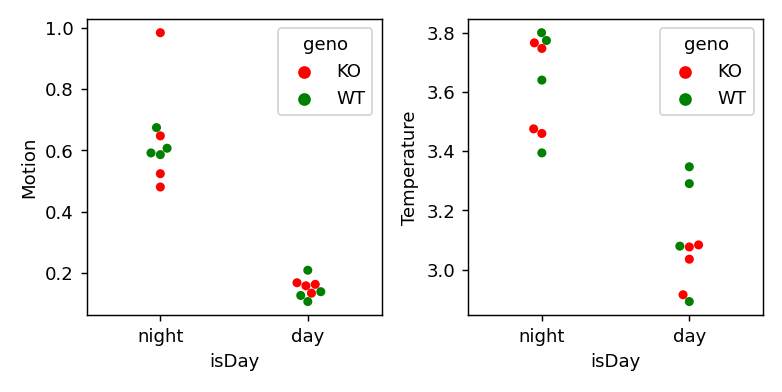

In [5]:
import seaborn as sns

motion_night = motion.loc[isDay.values==0,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
motion_day = motion.loc[isDay.values==1,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
motion_night['isDay'] = 'night'
motion_day['isDay'] = 'day'
motion_day_night = pd.concat([motion_night,motion_day])

temperature_night = temperature.loc[isDay.values==0,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
temperature_day = temperature.loc[isDay.values==1,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
temperature_night['isDay'] = 'night'
temperature_day['isDay'] = 'day'
temperature_day_night = pd.concat([temperature_night,temperature_day])


fig,ax = plt.subplots(1,2,figsize=(6,3))
sns.swarmplot(data=motion_day_night, x='isDay', y=0, hue='geno', ax=ax[0], palette=['r','g'])
ax[0].set_ylabel('Motion')

sns.swarmplot(data=temperature_day_night, x='isDay', y=0, hue='geno', ax=ax[1], palette=['r','g'])
ax[1].set_ylabel('Temperature')

plt.tight_layout()

<IPython.core.display.Javascript object>


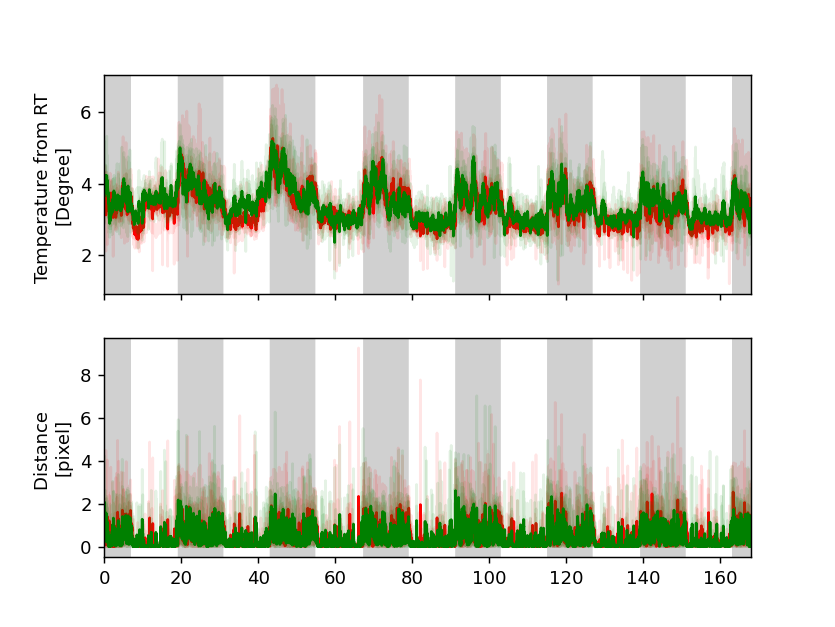

Text(0, 0.5, 'Distance \n[pixel]')

In [6]:


# motion 
motion_minutes = dict()
for info,rec in sub.iter_data_min():
    motion_minutes[(info['geno'], info['id'])] = rec['distance']
isDay = rec.isDay
motion_minutes = pd.DataFrame.from_dict(motion_minutes,)
motion_minutes.index = motion_minutes.index/60

# temperature 
temperature_minutes = dict()
for info,rec in sub.iter_data_min():
    temperature_minutes[(info['geno'], info['id'])] = rec['temp_rt_diff']
isDay = rec.isDay
temperature_minutes = pd.DataFrame.from_dict(temperature_minutes,)
temperature_minutes.index = temperature_minutes.index/60

fig,ax = plt.subplots(2,1,sharex=True) 
plot_avg(temperature_minutes.xs('KO',level=0,axis=1), isDay,color='r',ax=ax[0])
plot_avg(temperature_minutes.xs('WT',level=0,axis=1), isDay,color='g',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')

plot_avg(motion_minutes.xs('KO',level=0,axis=1), isDay,color='r', ax=ax[1])
plot_avg(motion_minutes.xs('WT',level=0,axis=1), isDay,color='g', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')

<IPython.core.display.Javascript object>


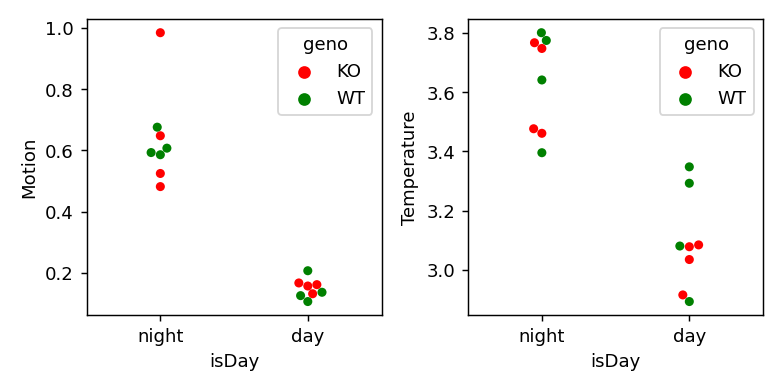

In [7]:
motion_minutes_night = motion_minutes.loc[isDay.values==0,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
motion_minutes_day = motion_minutes.loc[isDay.values==1,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
motion_minutes_night['isDay'] = 'night'
motion_minutes_day['isDay'] = 'day'
motion_minutes_day_night = pd.concat([motion_minutes_night,motion_minutes_day])

temperature_minutes_night = temperature_minutes.loc[isDay.values==0,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
temperature_minutes_day = temperature_minutes.loc[isDay.values==1,:].mean().reset_index().rename( columns={'level_0':'geno', 'level_1':'sub'})
temperature_minutes_night['isDay'] = 'night'
temperature_minutes_day['isDay'] = 'day'
temperature_minutes_day_night = pd.concat([temperature_minutes_night,temperature_minutes_day])


fig,ax = plt.subplots(1,2,figsize=(6,3))
sns.swarmplot(data=motion_minutes_day_night, x='isDay', y=0, hue='geno', ax=ax[0], palette=['r','g'])
ax[0].set_ylabel('Motion')

sns.swarmplot(data=temperature_minutes_day_night, x='isDay', y=0, hue='geno', ax=ax[1], palette=['r','g'])
ax[1].set_ylabel('Temperature')

plt.tight_layout()

# Spectral Density

<IPython.core.display.Javascript object>


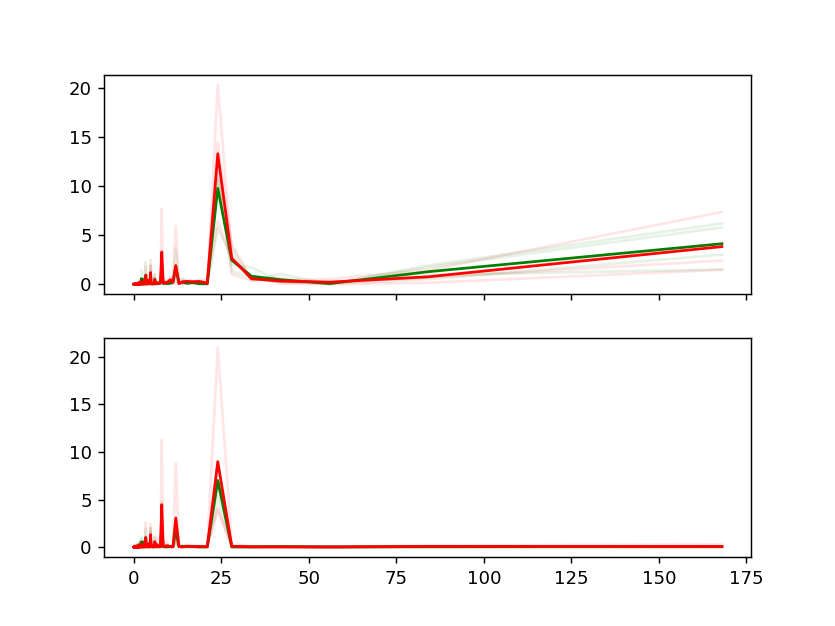

In [8]:
fig,ax = plt.subplots(2,1,sharex=True)

wt_temperature = temperature_minutes.xs('WT',level=0,axis=1).fillna(0)
wt_temperature_psd = dict()
wt_temperature_params = list()
for c in wt_temperature.columns:
    cosinor = Cosinor(wt_temperature[c].values)
    wt_temperature_psd[c] = cosinor.power_spectrum
    cosinor.compontents['sub'] = c
    cosinor.compontents['geno'] = 'WT'
    wt_temperature_params.append( cosinor.compontents )
    ax[0].plot(cosinor.period ,cosinor.power_spectrum,color='g', alpha = .1)
wt_temperature_psd = pd.DataFrame.from_dict(wt_temperature_psd)
wt_temperature_psd.index = cosinor.period 
ax[0].plot(wt_temperature_psd.index , wt_temperature_psd.mean(axis=1), color='g', alpha = 1)

ko_temperature = temperature_minutes.xs('KO',level=0,axis=1).fillna(0)
ko_temperature_psd = dict()
ko_temperature_params = list()
for c in ko_temperature.columns:
    cosinor = Cosinor(ko_temperature[c].values)
    ko_temperature_psd[c] = cosinor.power_spectrum
    cosinor.compontents['sub'] = c
    cosinor.compontents['geno'] = 'KO'
    ko_temperature_params.append( cosinor.compontents )
    ax[0].plot(cosinor.period , cosinor.power_spectrum, color='r', alpha = .1)
ko_temperature_psd = pd.DataFrame.from_dict(ko_temperature_psd)
ko_temperature_psd.index = cosinor.period 
ax[0].plot(ko_temperature_psd.index , ko_temperature_psd.mean(axis=1), color='r', alpha = 1)

temperature_params = pd.concat([pd.concat(wt_temperature_params), pd.concat(ko_temperature_params)])
temperature_params['acrophase_rad'] = temperature_params['acrophase'].apply(hour2radians)

wt_motion = motion_minutes.xs('WT',level=0,axis=1).fillna(0)
wt_motion_psd = dict()
for c in wt_motion.columns:
    cosinor = Cosinor(wt_motion[c].values)
    wt_motion_psd[c] = cosinor.power_spectrum
    ax[1].plot(cosinor.period ,cosinor.power_spectrum,color='g', alpha = .1)
wt_motion_psd = pd.DataFrame.from_dict(wt_motion_psd)
wt_motion_psd.index = cosinor.period 
ax[1].plot(wt_motion_psd.index , wt_motion_psd.mean(axis=1), color='g', alpha = 1)

ko_motion = motion_minutes.xs('KO',level=0,axis=1).fillna(0)
ko_motion_psd = dict()
for c in ko_motion.columns:
    cosinor = Cosinor(ko_motion[c].values)
    ko_motion_psd[c] = cosinor.power_spectrum
    ax[1].plot(cosinor.period , cosinor.power_spectrum, color='r', alpha = .1)
ko_motion_psd = pd.DataFrame.from_dict(ko_motion_psd)
ko_motion_psd.index = cosinor.period 
ax[1].plot(ko_motion_psd.index , ko_motion_psd.mean(axis=1), color='r', alpha = 1)


In [9]:
temperature_params

,mesor,amplitude,period,acrophase,sub,geno,acrophase_rad
0,3.555365,0.393207,24.849669,22.471,WT_71,WT,5.882894
0,3.150054,0.378624,24.652972,22.633,WT_74,WT,5.925306
0,3.570495,0.297507,25.118294,22.439,WT_79,WT,5.874516
0,3.368749,0.402452,24.726923,22.041,WT_81,WT,5.770320
0,3.256927,0.322296,25.108870,23.264,KO_69,KO,6.090501
0,3.199542,0.393431,24.481687,0.119,KO_70,KO,0.031154
0,3.427021,0.459941,24.943717,23.859,KO_72,KO,6.246272
0,3.425192,0.502897,24.384126,21.771,KO_75,KO,5.699634


In [10]:
wt_temperature

,WT_71,WT_74,WT_79,WT_81
0.000000,3.609268,3.790486,3.149694,4.112814
0.016667,3.714247,3.965268,3.204948,4.327954
0.033333,3.910251,4.050052,3.187560,4.223760
0.050000,3.963789,3.908811,3.155797,4.283324
0.066667,4.177649,3.809899,3.182344,4.776978
...,...,...,...,...
167.950000,3.145408,3.164156,2.922352,2.840256
167.966667,3.134747,3.757214,2.927666,2.830075
167.983333,3.129773,3.234284,2.916206,2.877516
168.000000,0.000000,3.360582,2.922350,2.832808


In [12]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,2))
sns.heatmap(pd.concat([wt_temperature, wt_temperature],axis=1).rolling(60,center=True,min_periods=0).mean().T,cmap='Purples') #,vmin=30,vmax=30)

In [29]:
import math

def transform_radians(radians):
    shifted_radians = radians - math.pi
    wrapped_radians = shifted_radians % (2 * math.pi)
    transformed_radians = wrapped_radians - math.pi
    return transformed_radians

temperature_params['acrophase_rad_rng'] = temperature_params['acrophase_rad'].apply(transform_radians)
#transform_radians(np.pi)
fig,ax = plt.subplots()
colors = ['g' if geno=='WT' else 'r' for geno in temperature_params['geno']]
ax.scatter(temperature_params['acrophase_rad_rng'].values,temperature_params['acrophase_rad_rng'].index,c=colors)


In [30]:
import pycircstat as cs
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
colors = ['g' if c=='WT' else 'r' for c in temperature_params['geno']]
ax.scatter(temperature_params['acrophase_rad'] , temperature_params['amplitude'] ,
               c=colors, s=7, alpha=1)

wt_avg_theta = cs.mean(temperature_params['acrophase_rad'][temperature_params['geno']=='WT'])
wt_std_theta = cs.std(temperature_params['acrophase_rad'][temperature_params['geno']=='WT'])
wt_avg_amp = temperature_params['amplitude'][temperature_params['geno']=='WT'].mean()

ko_avg_theta = cs.mean(temperature_params['acrophase_rad'][temperature_params['geno']=='KO'])
ko_std_theta = cs.std(temperature_params['acrophase_rad'][temperature_params['geno']=='KO'])
ko_avg_amp = temperature_params['amplitude'][temperature_params['geno']=='KO'].mean()

ax.plot([wt_avg_theta, wt_avg_theta], [0, wt_avg_amp], 'g-', linewidth=2)
ax.plot([ko_avg_theta, ko_avg_theta], [0, ko_avg_amp], 'r-', linewidth=2)

ax.errorbar(wt_avg_theta, wt_avg_amp, xerr=ko_std_theta, yerr=.2, capsize=0, fmt="", c="g")
ax.errorbar(ko_avg_theta, ko_avg_amp, xerr=ko_std_theta, yerr=.2, capsize=0, fmt="", c="r")

ax.set_xticklabels([0,3,6,9,12,15,18,21])
ax.set_rticks([])
